----------------------
# **Pre-Procesamiento de los Datos**
------------------------

-------------------
------------------
## **1.** **Importar Librerias**
-------------------
------------------

In [1]:
# LIBRARIES
import pandas as pd
from IPython.core.display import HTML
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

-------------------
------------------
## **2.** **Lectura de los Datos y Visualización**
-------------------
------------------

In [14]:
# CARGAR EL DATASET DE LAS PELICULAS 
movies = pd.read_csv('../Data/Raw/movie.csv')
ratings  = pd.read_csv('../Data/Raw/rating.csv')

# VISTA PREVIA
display(HTML(movies.head().to_html()))
display(HTML(ratings.head().to_html()))

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40


-------------------
------------------
## **2.** **Limpieza de los Datos y Visualización**
-------------------
------------------

In [15]:
# ELIMINAR FILAS CON VALORES NULL
movies = movies.dropna(subset=['movieId', 'title', 'genres'])
ratings = ratings.dropna(subset=['movieId', 'rating'])

# ELIMINAR FILAS CON "(no genres listed)"
movies = movies[movies['genres'] != "(no genres listed)"]

# ELIMINAR DUPLICADOS
movies = movies.drop_duplicates(subset=['movieId'])
ratings = ratings.drop_duplicates(subset=['userId', 'movieId'])

# ELIMINAR COLUMNAS INNECESARIAS 
ratings = ratings.drop(columns=['userId', 'timestamp'])

# VERIFICAR EL SHAPE DE MOVIES Y RATINGS
print("Shape de movies después de la limpieza:", movies.shape)
print("Shape de ratings después de la limpieza:", ratings.shape)

Shape de movies después de la limpieza: (27032, 3)
Shape de ratings después de la limpieza: (20000263, 2)


In [16]:
# CREAR DICCIONARIO PARA CONTAR LA FRECUENCIA DE LOS GENEROS 
genre_counter = Counter()

for genres in movies['genres']:
    genre_list = genres.split('|')
    genre_counter.update(genre_list)

# CONVERTIR EL DICCIONARIO A UN DATAFRAME PARA FACILITAR VISUALIZACIÓN 
genre_counts = pd.DataFrame.from_dict(genre_counter, orient='index').reset_index()
genre_counts.columns = ['genre', 'count']
genre_counts = genre_counts.sort_values(by='count', ascending=False)

# VER DATAFRAME CREADO
display(HTML(genre_counts.to_html(index=False)))

genre,count
Drama,13344
Comedy,8374
Thriller,4178
Romance,4127
Action,3520
Crime,2939
Horror,2611
Documentary,2471
Adventure,2329
Sci-Fi,1743


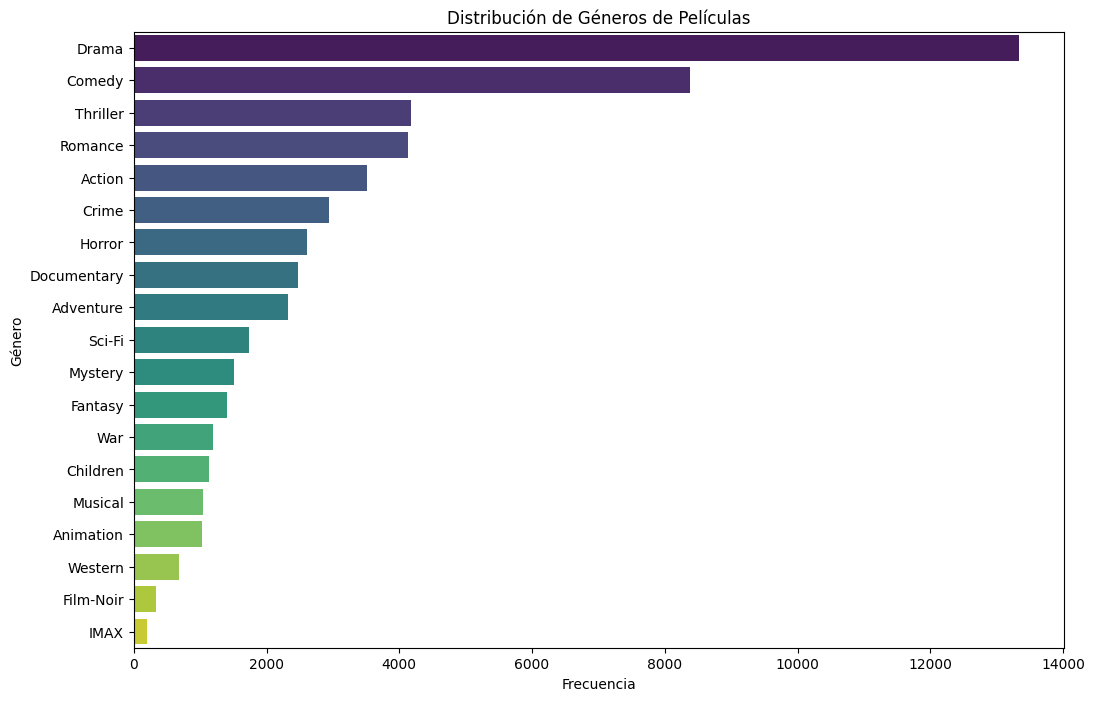

In [17]:
# VISUALIZACION GRAFICA DE LOS GENEROS DE LAS PELICULAS 
plt.figure(figsize=(12, 8))
sns.barplot(data=genre_counts, x='count', y='genre', hue='genre', dodge=False, palette='viridis', legend=False)
plt.title('Distribución de Géneros de Películas')
plt.xlabel('Frecuencia')
plt.ylabel('Género')
plt.show()

-------------------
------------------
## **3.** **Asociación de Sentimientos a Géneros**
-------------------
------------------

In [18]:
# CORRESPONDENCIA ENTRE GÉNEROS Y EMOCIONES 
genre_to_emotion = {
    'Drama': 'Sadness',
    'Comedy': 'Amusement',
    'Thriller': 'Suspense',
    'Romance': 'Love',
    'Action': 'Excitement',
    'Crime': 'Anger',
    'Horror': 'Fear',
    'Documentary': 'Curiosity',
    'Adventure': 'Excitement',
    'Sci-Fi': 'Wonder',
    'Mystery': 'Suspense',
    'Fantasy': 'Wonder',
    'War': 'Anger',
    'Children': 'Joy',
    'Musical': 'Joy',
    'Animation': 'Joy',
    'Western': 'Excitement',
    'Film-Noir': 'Mystery'
}

# FUNCION PARA MAPEAR GENEROS A EMOCIONES 
def map_genres_to_emotions(genres):
    genres_list = genres.split('|')
    emotions = [genre_to_emotion.get(genre) for genre in genres_list if genre in genre_to_emotion]
    return emotions

# APLICAR LA FUNCIÓN AL DATAFRAME DE PELICULAS 
movies['emotions'] = movies['genres'].apply(map_genres_to_emotions)

# VISTA DEL DATAFRAME ACTUALIZADO 
display(HTML(movies.head().to_html()))

,movieId,title,genres,emotions
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[Excitement, Joy, Joy, Amusement, Wonder]"
1,2,Jumanji (1995),Adventure|Children|Fantasy,"[Excitement, Joy, Wonder]"
2,3,Grumpier Old Men (1995),Comedy|Romance,"[Amusement, Love]"
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,"[Amusement, Sadness, Love]"
4,5,Father of the Bride Part II (1995),Comedy,[Amusement]


-------------------
------------------
## **4.** **Integrar los Datos de Ratings**
-------------------
------------------

In [19]:
# CALCULAR EL RATING PROMEDIO PARA CADA PELICULA 
average_ratings = ratings.groupby('movieId')['rating'].mean().reset_index()
average_ratings.columns = ['movieId', 'average_rating']

# VERIFICAR EL SHAPE DE average_ratings Y MOVIES
print("Shape de average_ratings después de calcular el promedio:", average_ratings.shape)
print("Shape de movies:", movies.shape)

Shape de average_ratings después de calcular el promedio: (26744, 2)
Shape de movies: (27032, 4)


In [20]:
# UNIR EL RATING PROMEDIO CON EL DATAFRAME DE PELICULAS 
movies = pd.merge(movies, average_ratings, on='movieId', how='left')

# VERIFICAR EL SHAPE DEL DATAFRAME COMBINADO
print("Shape del dataframe combinado:", movies.shape)

# VISTA DEL DATAFRAME COMBINADO 
display(HTML(movies.head().to_html()))

Shape del dataframe combinado: (27032, 5)


,movieId,title,genres,emotions,average_rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[Excitement, Joy, Joy, Amusement, Wonder]",3.921240
1,2,Jumanji (1995),Adventure|Children|Fantasy,"[Excitement, Joy, Wonder]",3.211977
2,3,Grumpier Old Men (1995),Comedy|Romance,"[Amusement, Love]",3.151040
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,"[Amusement, Sadness, Love]",2.861393
4,5,Father of the Bride Part II (1995),Comedy,[Amusement],3.064592


In [21]:
# RELLENAR VALORES NaN CON EL RATING PROMEDIO GLOBAL 
global_average_rating = ratings['rating'].mean()
movies['average_rating'] = movies['average_rating'].fillna(global_average_rating)

# VISTA DEL DATAFRAME ACTUALIZADO 
display(HTML(movies.head().to_html()))
print("Shape del dataframe después de rellenar NaN:", movies.shape)

,movieId,title,genres,emotions,average_rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[Excitement, Joy, Joy, Amusement, Wonder]",3.921240
1,2,Jumanji (1995),Adventure|Children|Fantasy,"[Excitement, Joy, Wonder]",3.211977
2,3,Grumpier Old Men (1995),Comedy|Romance,"[Amusement, Love]",3.151040
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,"[Amusement, Sadness, Love]",2.861393
4,5,Father of the Bride Part II (1995),Comedy,[Amusement],3.064592


Shape del dataframe después de rellenar NaN: (27032, 5)


-------------------
------------------
## **5.** **Guardar el Dataframe con los Datos Procesados**
-------------------
------------------

In [22]:
movies.to_csv('../Data/Processed/processed_movies.csv', index=False)
print("El DataFrame procesado ha sido guardado correctamente.")

El DataFrame procesado ha sido guardado correctamente.


In [23]:
# VERIFICACIÓN FINAL
print("Verificación de valores NaN en el DataFrame procesado:")
print(movies.isna().sum())

Verificación de valores NaN en el DataFrame procesado:
movieId           0
title             0
genres            0
emotions          0
average_rating    0
dtype: int64


In [24]:
# VISTA PREVIA FINAL DEL DATAFRAME
display(HTML(movies.head().to_html()))

,movieId,title,genres,emotions,average_rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[Excitement, Joy, Joy, Amusement, Wonder]",3.921240
1,2,Jumanji (1995),Adventure|Children|Fantasy,"[Excitement, Joy, Wonder]",3.211977
2,3,Grumpier Old Men (1995),Comedy|Romance,"[Amusement, Love]",3.151040
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,"[Amusement, Sadness, Love]",2.861393
4,5,Father of the Bride Part II (1995),Comedy,[Amusement],3.064592
